# Titanic: Machine Learning from Disaster 

# Predict Survival on the Titanic 

In [19]:
!jt -t monokai

In [2]:
import pandas as pd
import numpy as np



* Define the Problem
* Collect the Data 
* Exploratory Data Analysis
* Feature Engineering
* Modeling
* Testing 


# 1. Define the problem
        * We are predicting a binary outcome so classification would seem best suited to solve this problem.

In [3]:
from IPython.display import Image
Image(url='https://coolerinsights.com/wp-content/uploads/2012/04/Leadership-Lessons-in-Titanic-Sinking-1024x819.jpg')

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Description of Attributes

* Survived: 0 = no 1 = yes
* P class: Ticket class 1 = 1st , 2 = 2nd , 3 = 3rd
* Name: Name of Passenger 
* Sibsp: # of siblings / spouses aboard the titanic
* Parch: # of parents / children aboard the titanic
* Ticket: Ticket #
* Cabin : Cabin #
* Embarked : Port passenger Departed from  C = Cherbourg , Q = Queenstown , S = Southhampton


In [13]:
train.shape,test.shape # so we have to drop the target column which is Survived but we will get to that ...

((891, 12), (418, 11))

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.isnull().any() # cabin , age , and embarked having missing values we will have to take care of those 

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.info(),test.info() # I dont think the ticket number serves much of a purpose in this dataset ....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [20]:
train.isnull().sum() # we definetly need to fill the age with median values and do something about cabin 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Lets create some visualizations to see the categorical columns that are marked as objects in the cell above... which are Pclass,Cabin,Embarked,Sex and possibly age even though thats a numerical category we might bin that then take a look at it .....

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set() # making seaborn default 
plt.style.use('seaborn-dark')


In [36]:
train.Survived.value_counts() # in the training set 549 died and 342 survived 

0    549
1    342
Name: Survived, dtype: int64

In [26]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [40]:
def bar_chart(feature):# making function so I can just pass the column through as a paramater
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

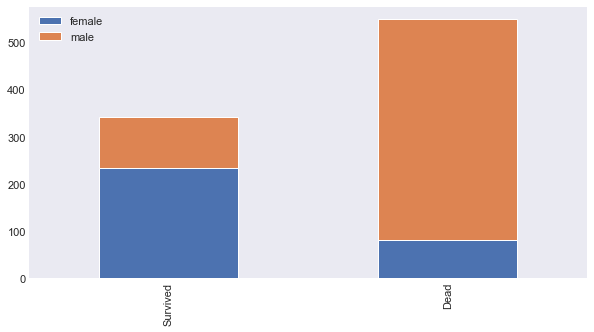

In [42]:
bar_chart('Sex') # males were more likely to die and females were more likely to survive...

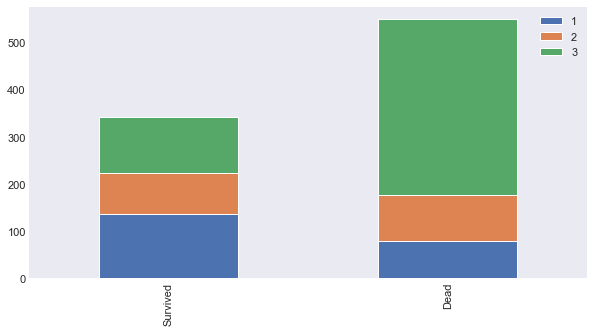

In [45]:
bar_chart('Pclass') # 3rd class was more likely to die ... is that because of location of the rooms that 3rd class provies more than likely usually the lower the class the more out of the way your room is ...

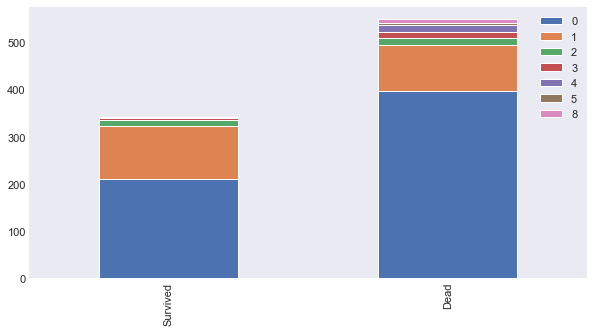

In [48]:
bar_chart('SibSp')#if you boarded with 2 or more siblings/spouse you was more likely to survive ....

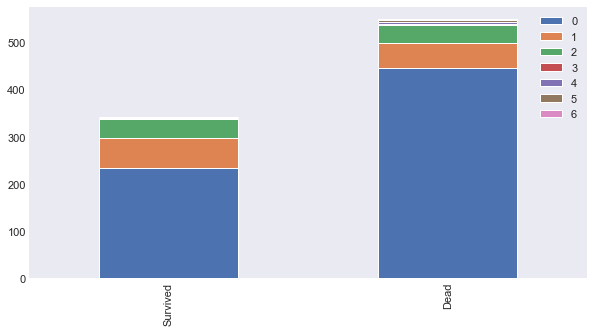

In [50]:
bar_chart('Parch') # if you had at least 2 children/parents you were more likely to survive and alone were more likely to die

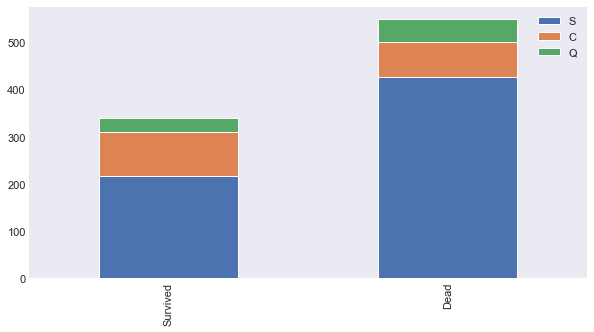

In [52]:
bar_chart('Embarked')#clearly if you departed from Cherbourg you was more likely to survive and S.hampton was more likely to die..

In [55]:
Image(url='http://clipart-library.com/images/6Tp5kExkc.png')

In [58]:
Image(url='https://clqtg10snjb14i85u49wifbv-wpengine.netdna-ssl.com/wp-content/uploads/2017/12/majorDesignFlawsOfTheTitanic.png')

# 3rd class is in that right corner where you see the hull filling up, how ironic just  a little bit of research and we understand why the 3rd class was more likely to die because of the location of their rooms......

# Now its Time for some Feature Engineering ..... the next step in the Machine Learning Process we will revisit some graphs after we handle some of the numerical columns. We will also make some new features and visualize them but lets keep things simple for Now .....

# Lets create a dataframe selector and focus on the numerical features first then work our way to the categorical stuff.......

In [66]:
train.isnull().sum()# Age, Sibsp, Parch and Fare seems like the numberical columns we should Focus on ....

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
train.Age.median() # later we will come back and Bin the ages and see if we get bettar results .....

28.0

In [76]:
train.SibSp.head(10) # can add this column with parch and make a new columns for combines family members..

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: SibSp, dtype: int64

In [77]:
train.Fare.head(10) # the fares range from low to high so we definetly wonna scale these ....

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet....Borrowed this from some data sciene book I read !
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
        ("std_scaler",StandardScaler()),
    ])

In [87]:
num_pipeline.fit_transform(train)

array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [ 0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [-0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

# So we handled the numerical columns with a pipeline lets take care of the categorical columns and then combine the two pipelines into one ... but later I will show how we could of filled in values and mapped the categorical features with out ScikitLearn which saved us alot code 8)....

In [88]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [90]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(['Pclass','Sex','Embarked'])),
    ("imputer", MostFrequentImputer()),# this will fill the embarked columns that are null I borrowed this from stackoverflow
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [92]:
cat_pipeline.fit_transform(train)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [93]:
from sklearn.pipeline import FeatureUnion # this is the function that connect the 2 seperate pipelines 
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [94]:
X_train = preprocess_pipeline.fit_transform(train)
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [95]:
y_train = train['Survived']

In [97]:
y_train.shape,X_train.shape

((891,), (891, 12))

In [ ]:
# checking to make sure we have the same dimensionality so we wont run into any problems 

In [99]:
from sklearn.svm import SVC # a classification technique thats finds an optimal boundary called the hyperplane
# which is used to seperate different classes. 
svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
X_test = preprocess_pipeline.fit_transform(test)
y_pred = svm_clf.predict(X_test)

In [102]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8260637271592328

# Beautiful We got 80% on  the mean score for our a cross validation score....remember cross validation helps with overfitting by partitioning the dataset into folds (10) and holds out on  a set at a time while training the model on the remaining data now this is just one approach , lets try another machine learnng algorithm and see if we can get bettar results

In [103]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8149526160481217

# Well the RandomForest classifier didnt do much bettar but 80% is still good maybe we can get bettar results if we add some more features and play with the columns some more 

In [105]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
})
submission.to_csv(r'C:\Users\computer\Desktop\Macine Learning Pdf\submission.csv', index=False)